The Sparks Foundation 
<br>
Author: Aparna S
### TASK 1 - Prediction using supervised Machine Learning
#### To predict the percentage and marks of a student based on the study hours.

#### Libraries required

In [2]:
import pandas as pd
import numpy as np

In [3]:
print("data from csv is read")
df= pd.read_csv("http://bit.ly/w-data")

data from csv is read


#### Sorting the data 
Sort and display based on hours of study to understand the trend of proportionality on scores.

In [4]:
df.sort_values(by=["Hours"],ascending=True)

,Hours,Scores
14,1.1,17
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30
20,2.7,30
9,2.7,25
2,3.2,27
13,3.3,42
4,3.5,30


### Data Summary
Get statistical summary of the dataframe.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.corr() # Strong positive correlation value 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Dividing the dependent and independent variables
x -> hours of study (Independent parameter)
<br>
y -> Marks (Dependent parameter)

In [7]:
x=df.iloc[:,:-1].values #  independent variable (hours of study)
y=df.iloc[:,1:].values #  dependent variable (scores)
hrs,scores=np.array(x).reshape(-1,1),np.array(y).reshape(-1,1)
print(hrs)
print(scores)


[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


### Visualizing the dataset
A scatter plot visualization 

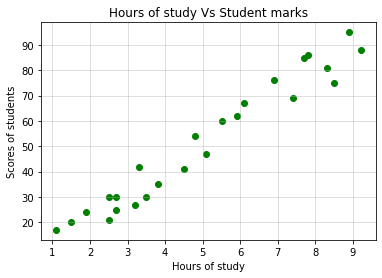

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.title("Hours of study Vs Student marks")
plt.xlabel("Hours of study")
plt.ylabel("Scores of students")
plt.scatter(x=hrs,y=scores,c="green")
plt.grid(alpha=0.5)


### Splitting the model into test and train data

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test= train_test_split(hrs,scores,test_size=0.25,random_state=3)


### Fitting the trained data model in regression

In [10]:
regression=LinearRegression()
regression.fit(X_train,y_train)
print("Data is trained")
print(regression.score(X_test, y_test))

Data is trained
0.9340752536504426


### Fitting of the Linear Regression line 
Plotting the line of best fit with scatter plot using seaborn regplots

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


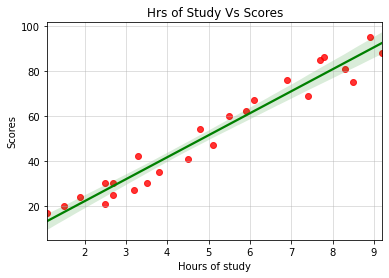

In [11]:
ax=sn.regplot(hrs,scores,data=df,scatter_kws={"color": "red"}, line_kws={"color": "green"})
ax.set(xlabel="Hours of study",ylabel="Scores",title="Hrs of Study Vs Scores")
ax.grid(alpha=0.5)

### Predicting scores for test data


In [12]:
predicted_y= regression.predict(X_test)
print(predicted_y)

[[60.67436213]
 [19.99792252]
 [45.17857561]
 [68.42225538]
 [87.79198853]
 [25.80884246]
 [33.55673572]]


### Comparison of actual scores (data) and predicted scores (data)

In [13]:
results=pd.DataFrame({'Actual Data': y_test.flatten(), 'Predicted Data': predicted_y.flatten()})
results

,Actual Data,Predicted Data
0,67,60.674362
1,24,19.997923
2,41,45.178576
3,76,68.422255
4,95,87.791989
5,30,25.808842
6,42,33.556736


### Predicting scores for 9.25 hours of study per day

In [14]:
new_hour= np.array(9.25).reshape(-1,1)
predict_score= regression.predict(new_hour)
print(predict_score)
print("The marks of student studying for 9.25 hrs/day is esitmated to  %f" %(predict_score))

[[91.18169183]]
The marks of student studying for 9.25 hrs/day is esitmated to  91.181692


#### Evaluation of Model

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("Root mean squared error:",mean_squared_error(y_test,predicted_y,squared=False))
print("Mean absolute error",mean_absolute_error(y_test,predicted_y))


Root mean squared error: 6.230374545162497
Mean absolute error 5.989495552434456


### Insights and Summary from the data
<ul>
    <li>The relationship between the study hours and outcome of scores are directly proportional.</li>
    <li>Since it is directly porportional (Linear upward slope), it has a strong positive correlation. </li>
